In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from keras.datasets import mnist

Using TensorFlow backend.


In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [7]:
from keras.utils import to_categorical

X_train = X_train.reshape(-1,28*28)/255.
X_test = X_test.reshape(-1,28*28)/255.
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [11]:
from keras.models import Sequential
from keras.layers import Dense

In [13]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(784,))) # 128 노드, ReLU 적용
model.add(Dense(16, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [14]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['acc'])

In [15]:
history = model.fit(X_train, y_train, batch_size=128, epochs=20,
                    validation_split=0.2)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 1s 29us/step - loss: 0.5010 - acc: 0.8629 - val_loss: 0.2368 - val_acc: 0.9323
Epoch 2/20
48000/48000 [==============================] - 1s 16us/step - loss: 0.2167 - acc: 0.9368 - val_loss: 0.1895 - val_acc: 0.9445
Epoch 3/20
48000/48000 [==============================] - 1s 19us/step - loss: 0.1688 - acc: 0.9496 - val_loss: 0.1575 - val_acc: 0.9556
Epoch 4/20
48000/48000 [==============================] - 1s 16us/step - loss: 0.1382 - acc: 0.9593 - val_loss: 0.1399 - val_acc: 0.9585
Epoch 5/20
48000/48000 [==============================] - 1s 16us/step - loss: 0.1177 - acc: 0.9656 - val_loss: 0.1350 - val_acc: 0.9610
Epoch 6/20
48000/48000 [==============================] - 1s 17us/step - loss: 0.1026 - acc: 0.9697 - val_loss: 0.1341 - val_acc: 0.9602
Epoch 7/20
48000/48000 [=========

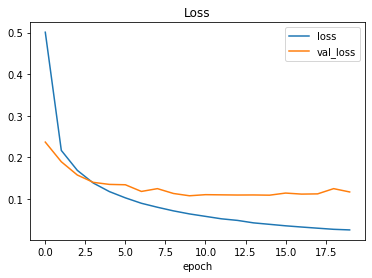

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.xlabel('epoch')
plt.legend(['loss','val_loss'])

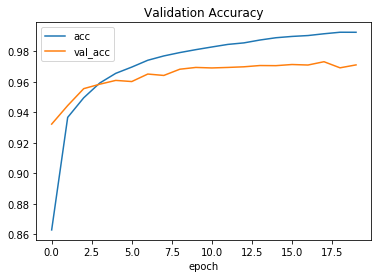

In [17]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Validation Accuracy')
plt.xlabel('epoch')
plt.legend(['acc','val_acc'])

In [18]:
ws = model.get_weights()

In [19]:
ws[0].shape

(784, 64)

In [20]:
pred_y = model.predict(X_test)

In [21]:
pred_y[:10]

array([[5.9958727e-09, 8.2398602e-11, 1.3919062e-06, 1.4621949e-05,
        2.8471885e-16, 3.7465480e-14, 2.6247795e-20, 9.9998403e-01,
        2.4996709e-09, 6.9096235e-09],
       [1.2191098e-09, 4.0565310e-06, 9.9999595e-01, 1.4230375e-09,
        1.7463953e-19, 1.4112733e-10, 2.8758183e-11, 2.1104684e-15,
        5.4726590e-10, 2.6909646e-20],
       [1.7998448e-07, 9.9981433e-01, 4.2284886e-05, 3.0948084e-07,
        3.1447216e-06, 1.1173242e-07, 3.3806862e-06, 9.2793765e-05,
        4.2794058e-05, 6.1756219e-07],
       [9.9996459e-01, 3.0950066e-08, 2.7655808e-06, 3.4601716e-12,
        9.6977567e-07, 6.9057999e-09, 3.0406991e-05, 1.3391253e-06,
        1.1113639e-11, 1.0444496e-08],
       [3.3802390e-08, 8.4103418e-09, 1.2376293e-07, 1.6019374e-08,
        9.9951923e-01, 2.2979684e-11, 1.1622145e-08, 2.5018130e-04,
        2.6436294e-07, 2.3011872e-04],
       [5.2427223e-09, 9.9979252e-01, 9.6509382e-07, 3.1568415e-09,
        3.1824385e-07, 1.2502457e-10, 5.8648211e-09, 2.05

In [22]:
pred_y = model.predict_classes(X_test)

In [23]:
(y_test.argmax(axis=1) == pred_y).mean()

0.9742